# Backtest Playground (15m / 1y)

`Run -> Run All Cells` で 15分足1年分のデータ取得とバックテストを実行します。

In [11]:
from pathlib import Path
import os
import sys

CANDIDATE_ROOTS = [
    Path.cwd(),
    Path.cwd().parent,
    Path('/Users/umegakigen/gitProjects/crypto_trade_bot'),
]

ROOT = None
for candidate in CANDIDATE_ROOTS:
    if (candidate / 'pybot').exists() and (candidate / 'research').exists():
        ROOT = candidate
        break

if ROOT is None:
    raise RuntimeError('project root not found')

os.chdir(ROOT)
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

print('ROOT =', ROOT)


ROOT = /Users/umegakigen/gitProjects/crypto_trade_bot


In [12]:
# Parameters
PAIR = 'SOL/USDC'
TIMEFRAME = '15m'
YEARS_OF_DATA = 1.0
REFRESH_DATA = False

CONFIG_PATH = ROOT / 'research/models/core_long_15m_v0/config/current.json'
CSV_PATH = ROOT / 'research/data/raw/solusdc_15m_1y.csv'
OUTPUT_PATH = ROOT / 'research/data/processed/backtest_15m_1y_latest.json'
INITIAL_CAPITAL_JPY = 1_000_000


print('PAIR =', PAIR)
print('TIMEFRAME =', TIMEFRAME)
print('YEARS_OF_DATA =', YEARS_OF_DATA)
print('REFRESH_DATA =', REFRESH_DATA)
print('CONFIG_PATH =', CONFIG_PATH)
print('CSV_PATH =', CSV_PATH)
print('OUTPUT_PATH =', OUTPUT_PATH)
print('INITIAL_CAPITAL_JPY =', INITIAL_CAPITAL_JPY)



PAIR = SOL/USDC
TIMEFRAME = 15m
YEARS_OF_DATA = 1.0
REFRESH_DATA = False
CONFIG_PATH = /Users/umegakigen/gitProjects/crypto_trade_bot/research/models/core_long_15m_v0/config/current.json
CSV_PATH = /Users/umegakigen/gitProjects/crypto_trade_bot/research/data/raw/solusdc_15m_1y.csv
OUTPUT_PATH = /Users/umegakigen/gitProjects/crypto_trade_bot/research/data/processed/backtest_15m_1y_latest.json
INITIAL_CAPITAL_JPY = 1000000


In [13]:
import subprocess

fetch_cmd = [
    sys.executable,
    '-m',
    'research.scripts.fetch_ohlcv',
    '--pair',
    PAIR,
    '--timeframe',
    TIMEFRAME,
    '--years',
    str(YEARS_OF_DATA),
    '--output',
    str(CSV_PATH),
]
if REFRESH_DATA:
    fetch_cmd.append('--refresh')

print('[run]', ' '.join(fetch_cmd))
subprocess.run(fetch_cmd, cwd=str(ROOT), check=True)


[run] /Users/umegakigen/gitProjects/crypto_trade_bot/.venv/bin/python3 -m research.scripts.fetch_ohlcv --pair SOL/USDC --timeframe 15m --years 1.0 --output /Users/umegakigen/gitProjects/crypto_trade_bot/research/data/raw/solusdc_15m_1y.csv
[research] ohlcv reused {'pair': 'SOL/USDC', 'timeframe': '15m', 'target_bars': 35040, 'bars': 35040, 'first_close': '2025-02-24T14:30:00Z', 'last_close': '2026-02-24T14:15:00Z', 'output': '/Users/umegakigen/gitProjects/crypto_trade_bot/research/data/raw/solusdc_15m_1y.csv'}


CompletedProcess(args=['/Users/umegakigen/gitProjects/crypto_trade_bot/.venv/bin/python3', '-m', 'research.scripts.fetch_ohlcv', '--pair', 'SOL/USDC', '--timeframe', '15m', '--years', '1.0', '--output', '/Users/umegakigen/gitProjects/crypto_trade_bot/research/data/raw/solusdc_15m_1y.csv'], returncode=0)

In [14]:
import json

backtest_cmd = [
    sys.executable,
    '-m',
    'research.scripts.run_backtest',
    '--config',
    str(CONFIG_PATH),
    '--bars',
    str(CSV_PATH),
    '--output',
    str(OUTPUT_PATH),
]

print('[run]', ' '.join(backtest_cmd))
subprocess.run(backtest_cmd, cwd=str(ROOT), check=True)

report = json.loads(OUTPUT_PATH.read_text(encoding='utf-8'))
summary = report.get('summary', {})
reasons = report.get('no_signal_reason_counts', {})
top_reasons = sorted(reasons.items(), key=lambda item: item[1], reverse=True)[:10]

print('[summary]', summary)
print('[top_no_signal_reasons]', top_reasons)
print('[saved]', OUTPUT_PATH)


[run] /Users/umegakigen/gitProjects/crypto_trade_bot/.venv/bin/python3 -m research.scripts.run_backtest --config /Users/umegakigen/gitProjects/crypto_trade_bot/research/models/core_long_15m_v0/config/current.json --bars /Users/umegakigen/gitProjects/crypto_trade_bot/research/data/raw/solusdc_15m_1y.csv --output /Users/umegakigen/gitProjects/crypto_trade_bot/research/data/processed/backtest_15m_1y_latest.json
[research] backtest completed {'total_bars': 35040, 'decision_enter_count': 694, 'decision_no_signal_count': 19604, 'closed_trades': 694, 'open_trades': 0, 'wins': 228, 'losses': 466, 'win_rate_pct': 32.853, 'average_pnl_pct': -0.21037, 'total_pnl_pct': -145.996898, 'average_scaled_pnl_pct': -0.210375, 'total_scaled_pnl_pct': -146.000485, 'average_r_multiple': -0.186, 'first_bar_close_time': '2025-02-24T14:30:00Z', 'last_bar_close_time': '2026-02-24T14:15:00Z'}
[research] top no-signal reasons [('EMA_TREND_FILTER_FAILED', 15242), ('RECLAIM_NOT_FOUND', 1347), ('PULLBACK_NOT_FOUND', 

## Charts

2時間足Notebookと同様に、主要な可視化を表示します。


[chart] closed_trades = 694
[chart] wins/losses = 228 / 466


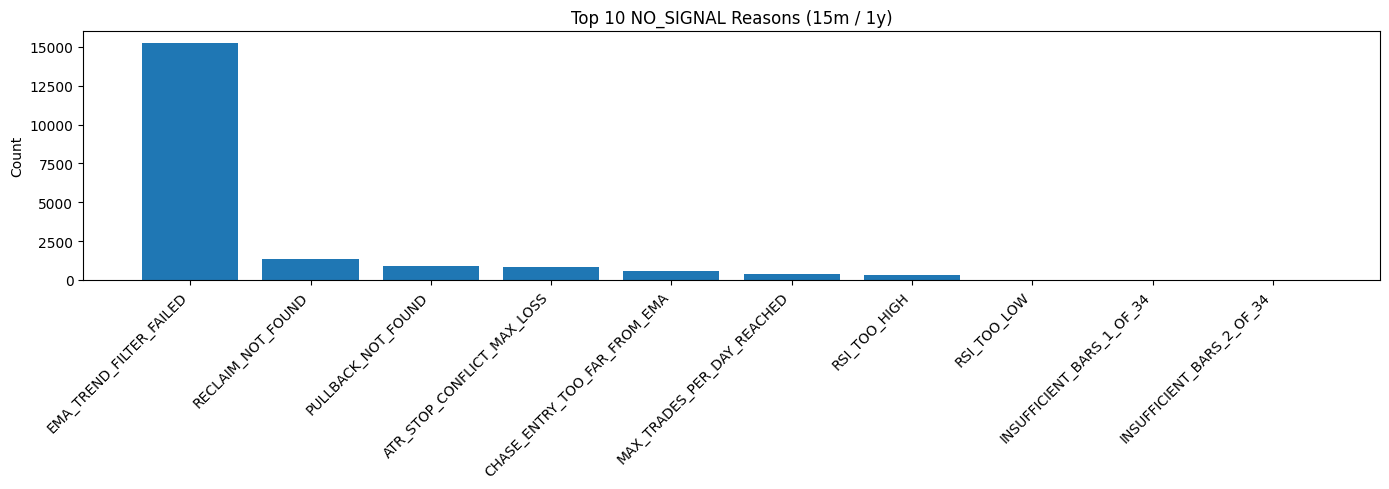

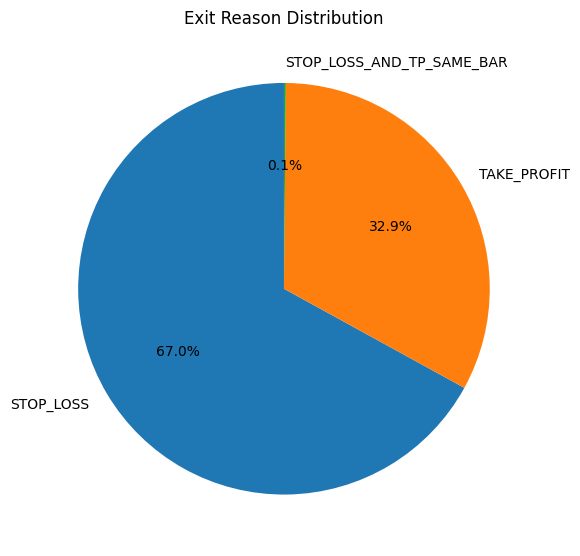

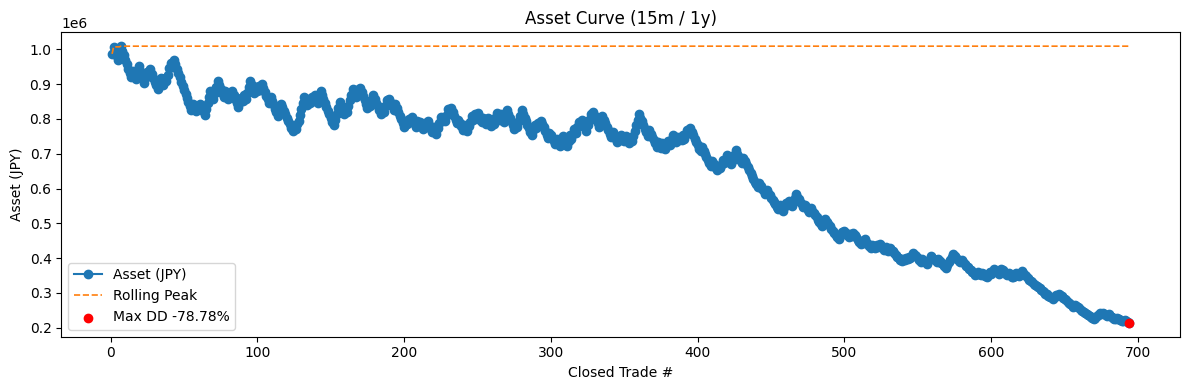

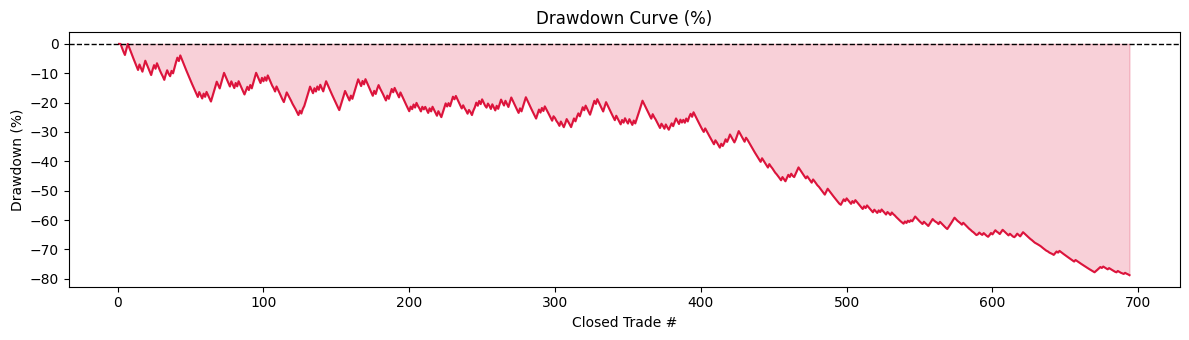

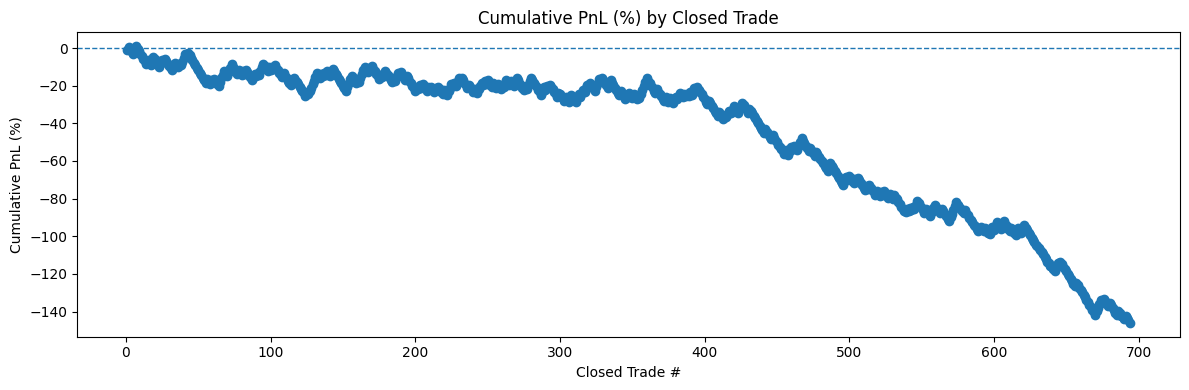

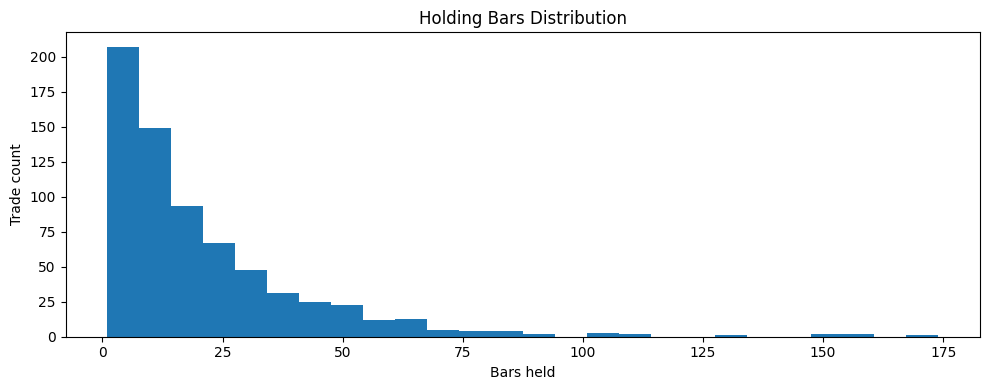

In [15]:
import importlib.util
import subprocess

if importlib.util.find_spec('matplotlib') is None:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'matplotlib'])

import matplotlib.pyplot as plt

summary = report.get('summary', {})
trades = report.get('trades', [])
no_signal_reasons = report.get('no_signal_reason_counts', {})

print('[chart] closed_trades =', summary.get('closed_trades'))
print('[chart] wins/losses =', summary.get('wins'), '/', summary.get('losses'))

# 1) Top no-signal reasons
if no_signal_reasons:
    top = sorted(no_signal_reasons.items(), key=lambda item: item[1], reverse=True)[:10]
    labels = [item[0] for item in top]
    values = [item[1] for item in top]

    plt.figure(figsize=(14, 5))
    plt.bar(range(len(labels)), values)
    plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
    plt.title('Top 10 NO_SIGNAL Reasons (15m / 1y)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print('[chart] no no-signal reasons')

# 2) Exit reason distribution
exit_reason_counts = {}
for trade in trades:
    reason = trade.get('exit_reason')
    if not isinstance(reason, str) or reason == '':
        continue
    exit_reason_counts[reason] = exit_reason_counts.get(reason, 0) + 1

if exit_reason_counts:
    labels = list(exit_reason_counts.keys())
    values = [exit_reason_counts[label] for label in labels]

    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('Exit Reason Distribution')
    plt.tight_layout()
    plt.show()
else:
    print('[chart] no exit reasons')

# 3) Equity / Drawdown / Cumulative PnL
def _to_float(value):
    try:
        return float(value)
    except (TypeError, ValueError):
        return None

scaled_pnl_values = []
holding_bars = []
for trade in trades:
    scaled = _to_float(trade.get('scaled_pnl_pct'))
    if scaled is not None:
        scaled_pnl_values.append(scaled)

    bars = _to_float(trade.get('holding_bars'))
    if bars is not None:
        holding_bars.append(bars)

if not scaled_pnl_values:
    print('[chart] no scaled_pnl_pct values, equity/drawdown/cumulative skipped')
else:
    initial_capital_jpy = float(INITIAL_CAPITAL_JPY)
    equity_curve = []
    equity = float(initial_capital_jpy)
    for value in scaled_pnl_values:
        equity *= (1.0 + value / 100.0)
        equity_curve.append(equity)

    peaks = []
    drawdowns = []
    peak = equity_curve[0]
    for value in equity_curve:
        peak = max(peak, value)
        peaks.append(peak)
        drawdowns.append((value / peak) - 1.0)

    max_drawdown = min(drawdowns)
    max_drawdown_pct = max_drawdown * 100.0
    max_dd_trade_index = drawdowns.index(max_drawdown) + 1

    x = list(range(1, len(equity_curve) + 1))

    plt.figure(figsize=(12, 4))
    plt.plot(x, equity_curve, marker='o', label='Asset (JPY)')
    plt.plot(x, peaks, linestyle='--', linewidth=1.2, label='Rolling Peak')
    plt.scatter([max_dd_trade_index], [equity_curve[max_dd_trade_index - 1]], color='red', zorder=5, label=f'Max DD {max_drawdown_pct:.2f}%')
    plt.title('Asset Curve (15m / 1y)')
    plt.xlabel('Closed Trade #')
    plt.ylabel('Asset (JPY)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 3.5))
    drawdown_pct_series = [value * 100.0 for value in drawdowns]
    plt.plot(x, drawdown_pct_series, color='crimson')
    plt.fill_between(x, drawdown_pct_series, 0, color='crimson', alpha=0.2)
    plt.axhline(0, linestyle='--', linewidth=1, color='black')
    plt.title('Drawdown Curve (%)')
    plt.xlabel('Closed Trade #')
    plt.ylabel('Drawdown (%)')
    plt.tight_layout()
    plt.show()

    cumulative = []
    running = 0.0
    for value in scaled_pnl_values:
        running += value
        cumulative.append(running)

    plt.figure(figsize=(12, 4))
    plt.plot(range(1, len(cumulative) + 1), cumulative, marker='o')
    plt.axhline(0, linestyle='--', linewidth=1)
    plt.title('Cumulative PnL (%) by Closed Trade')
    plt.xlabel('Closed Trade #')
    plt.ylabel('Cumulative PnL (%)')
    plt.tight_layout()
    plt.show()

# 4) Holding bars histogram
if holding_bars:
    plt.figure(figsize=(10, 4))
    bins = max(10, min(60, int(len(holding_bars) ** 0.5)))
    plt.hist(holding_bars, bins=bins)
    plt.title('Holding Bars Distribution')
    plt.xlabel('Bars held')
    plt.ylabel('Trade count')
    plt.tight_layout()
    plt.show()
else:
    print('[chart] no holding_bars values')

